# **Task 1**

### **Simple Linear Regression**

* In this task, machine learning in the Python programming language was implemented with a linear regression model.

**Prediction of Simple Linear Regression** 


### GRIP THE SPARKS FOUNDATION ###
# Author: Muhammet Varlı

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Read

In [34]:
# Data Reading from remote the link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# 2. Data Visulization

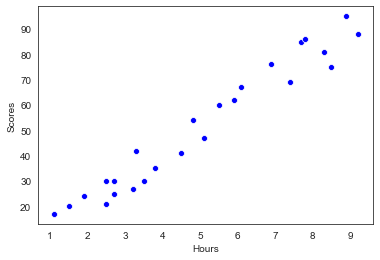

In [41]:
sns.scatterplot(x="Hours",y="Scores",data=df,color = 'Blue',marker='o');

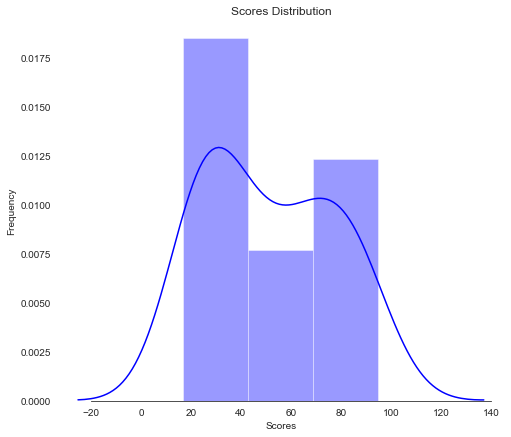

Skewness: 0.233965
Kurtosis: -1.443833


In [42]:
# Frequency Distribution of the Scores
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['Scores'], color="blue");


ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Scores")
ax.set(title="Scores Distribution")
sns.despine(trim=True, left=True)
plt.show()


# Skewness and Kurtosis
print("Skewness: %f" % df['Scores'].skew())
print("Kurtosis: %f" % df['Scores'].kurt())

# 3. Data Preparation

In [43]:
X = df.drop(['Scores'],axis=1)
y = df['Scores'].values

In [44]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [45]:
y[0:5]

array([21, 47, 27, 75, 30], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# 4. Training the Algorithm

## Modelling

In [47]:
from sklearn.linear_model import LinearRegression  


lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

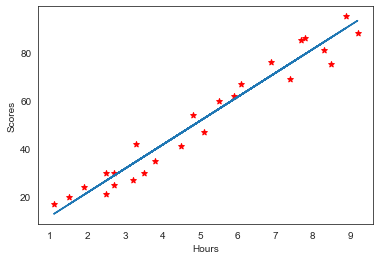

In [48]:
# Plotting the regression line

line = lin_reg.coef_*X + lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'Red',marker='*')
plt.xlabel('Hours')
plt.ylabel('Scores');
plt.plot(X, line);
plt.show()

* As seen in the graphic, there is a linear relationship between working hours and the score obtained.

# 5. Making Predictions

In [58]:
print(X_test) # Testing data - In Hours
y_pred = lin_reg.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


* Comparison of the actual values and the predicted values we obtained with the linear regression model we trained.

In [59]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [60]:
# You can also test with your own data
hours = np.array([9.25]).reshape(-1,1)
own_pred = lin_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# 6.Evaluating the model

### Mean Squared Error and Root Mean Squared Error

In [62]:
from sklearn.metrics import mean_squared_error

# Let's see what is the prediction error of our model.
y_pred_lr = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred_lr)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression MSE: ",lin_mse)
print("Linear Regression RMSE: ",lin_rmse)

Linear Regression MSE:  21.5987693072174
Linear Regression RMSE:  4.6474476121003665


### R2 Score

In [64]:
# Let's see how accurate is our model.
from sklearn import metrics
accuracy_lin = metrics.r2_score(y_test, y_pred_lr)
print("Linear Regression r2: ",accuracy_lin)

Linear Regression r2:  0.9454906892105356


### Mean Absolute Error

In [66]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression MAE: ",lin_mae)

Linear Regression MAE:  4.183859899002975
